
The stock price is modeled using geometric Brownian motion, where the logarithm of the stock price follows a stochastic differential equation with a drift term (μ), a volatility term (σ), and a stochastic component represented by Brownian motion (W(t)). 
This model is commonly employed to capture the dynamic behavior of financial assets in continuous time.

The equation for S_T(Stock price at time T) is given by:

<img src="montecarlo_gbm_pricing.png" alt="formula for stock price at T" width="600"/>

Explanation:

<img src="exp.png" alt="formula for stock price at T" width="600"/>

where:
- dt is the time step,
- np.random.normal(size=(steps, N)) generates a matrix of random numbers,
the N represents number of trials for the simulation to take place. 

This repeated sampling of a single variable (stock price at T) which will converge or approximate to the mean of the stock price distribution (its true value) according to the law of large numbers is called as **Monte-carlo Simulation Technique**.


In [21]:
import numpy as np
import matplotlib.pyplot as plt


def geo_paths(S, T, r, q, sigma, steps, N):
    """
    Inputs
    #S = Current stock Price
    #K = Strike Price
    #T = Time to maturity 1 year = 1, 1 months = 1/12
    #r = risk free interest rate
    #q = dividend yield
    # sigma = volatility 
    
    Output
    # [steps,N] Matrix of asset paths 
    """
    dt = T/steps  #dt is the no. of time steps,
    
    ST = np.log(S) +  np.cumsum(((r - q - sigma**2/2)*dt +\  #cumsum computes the cumulative sum along the specified axis.
                              sigma*np.sqrt(dt) * \
                              np.random.normal(size=(steps,N))),axis=0)  #generates a matrix of random numbers of size (steps,N),
    
    return np.exp(ST)

S = 100 #stock price S_{0}
K = 110 # strike
T = 1/2 # time to maturity
r = 0.05 # risk free risk in annual %
q = 0.02 # annual dividend rate
sigma = 0.25 # annual volatility in %
steps = 100 # time steps
N = 100000 # number of trials

paths= geo_paths(S,T,r, q,sigma,steps,N)


payoffs = np.maximum(paths[-1]-K, 0)
option_price = np.mean(payoffs)*np.exp(-r*T) #discounting back to present value
option_price

3.8610367980855935

Text(0.5, 1.0, 'Geometric Brownian Motion')

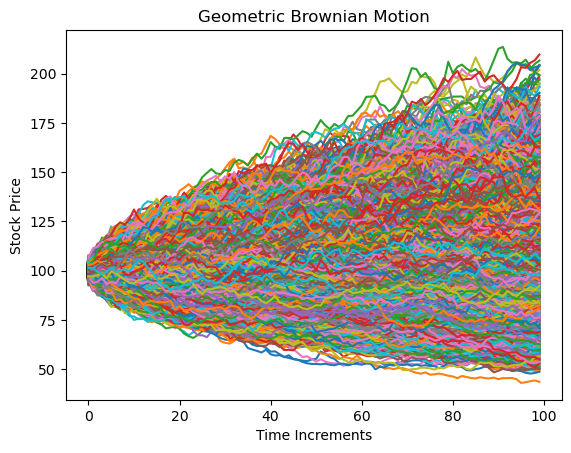

In [16]:
# plot of various stock price paths of N trajectories for dt time steps

plt.plot(paths);
plt.xlabel("Time Increments")
plt.ylabel("Stock Price")
plt.title("Geometric Brownian Motion")